## Assignemnt #1 - find genes with differential gene expression patterns. 

We want to find the genes that have statistically significant patterns of their gene expression levels. 

Define a measure that captures the idea of spatially varying gene expression. Think about it, there are many ways to do that. 

Hint: If expression pattern is uniform, what do you expect from two cells that are neighbors compared to cells that are not? 

Repeat your analysis taking into account cell types - test all five different cell type levels




## Assignment #2 - find clusters in the gene expression data. 

Cluster the data (after appropriate cleanup / transformation / dimensionlity reduction)

Analyze the agreement between your clusters and the type levels provided by the Allen institute

Idenitfy genes whos expression matches your grouping. 

Score for each cluster whether it is in proximity to other cells of the same type or not.  

## Assignemnt #3 - Find cell type association

Create distance matrix of cell type association and cluster it to find which cell types are in spatial proximity to each other

## Work in class - Day 1 - Thursday

## Key priority: 

### 1. load the data (requires to install anndata using conda)

## Assignment #1:

### 2. Create a small dataframe with X,Y,Gene1,Gene2 for a single Slice (see Notebook 05_TheData for help)

### 3. Permutation test: think of the following - would local expression variability (sample of neighboring cells ) be the same as a random sample? 

### 4. How would you create a sample of local cells? How would you "break" that? 

### 5. Use the small data matrix you created to test any idea you created in 4 - how would yo vizualize it? 

## Assignemt #2: 

### 6. Feature selection - what genes do you want to use for clustering? How would you decide that? How would you plot that? 

### 7. Transformation - what transformation of the data could be useful? Do you even need to transform the data? How would you know? 

## Work in class - Day 2 - Friday

## Assignment #1: Use the code from Notebook 05 (shown below)



In [3]:
import anndata
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
adata = anndata.read_h5ad('../Data/Brain_AllenData.h5ad')

In [2]:
ix = adata.obs['Slice']=='C57BL6J-638850.44'
xy=np.vstack((adata.obs['x'][ix],adata.obs['y'][ix])).T
from sklearn.neighbors import NearestNeighbors

k = 5  # or any other number you prefer
nbrs = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(xy)
distances, indices = nbrs.kneighbors(xy)

We can permute X and Y

In [17]:
xy_perm = np.zeros_like(xy)
xy_perm[:,0] = np.random.permutation(xy[:,0])
xy_perm[:,1] = np.random.permutation(xy[:,1])

nbrs_perm = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(xy_perm)
distances_perm, indices_perm = nbrs_perm.kneighbors(xy_perm)

Think about how to use this code to create a permutation statistical test for the difference in gene expression

## Work in class - Day 3 - try to wrap up the permutation test

Below is the code for permutation test for a single gene. 
1. Get this working in your own notebooks. 

2. Make a function out of it

3. Apply this to all genes in one slice

4. Apply this to all slices (time permiting)

5. Do you need to correct for multiple testing? 

6. Summarize in plots the number of significant genes. 


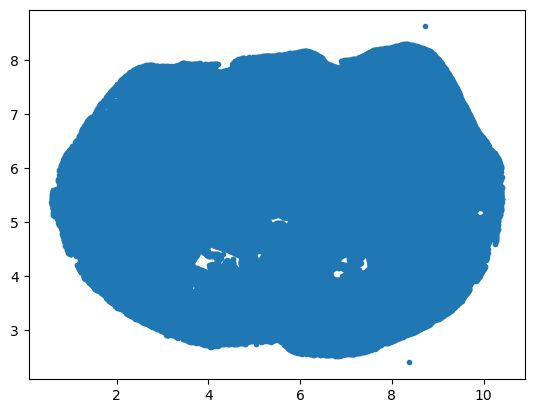

In [21]:
plt.plot(xy[:,0],xy[:,1],'.')

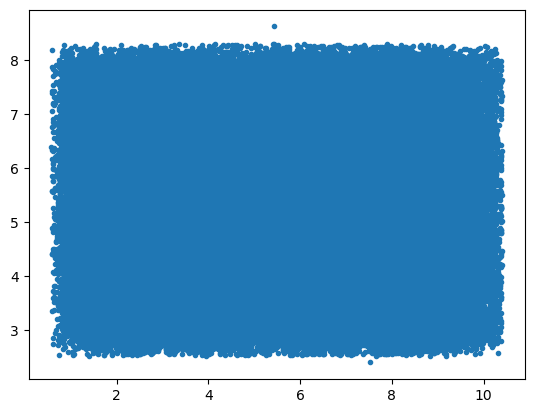

In [22]:
plt.plot(xy_perm[:,0],xy_perm[:,1],'.')

In [24]:
g = adata.X[:,adata.var['gene_symbol'] == 'Igfbp2'].toarray().flatten()[ix]
g_perm = np.random.permutation(g)


In [30]:
g[indices[:,1:]]

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       ...,
       [ 6.,  1.,  1.,  3.],
       [ 9.,  1.,  2., 11.],
       [ 1.,  4.,  2.,  1.]], dtype=float32)

In [37]:
std_local = g[indices[:,1:]].std(axis=1)
std_perm = g_perm[indices[:,1:]].std(axis=1)


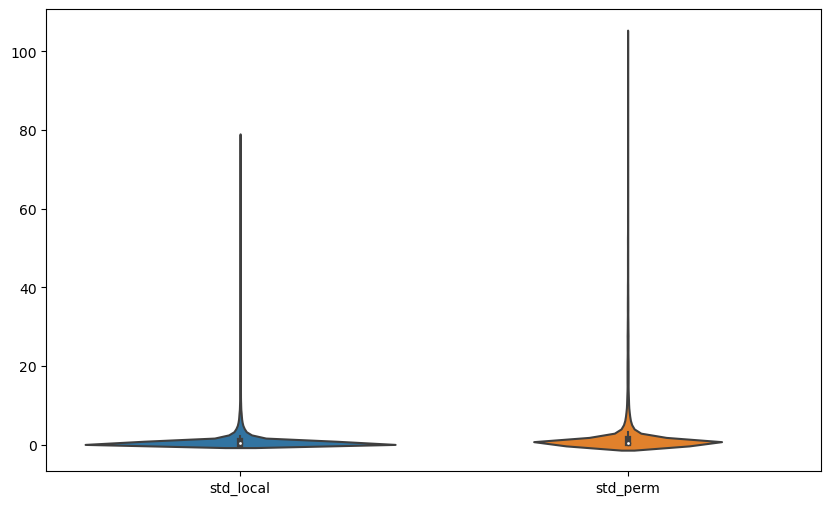

Average of std_local:  1.2525879
Average of std_perm:  2.5900328


In [38]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.violinplot(data=[std_local, std_perm])
plt.xticks([0, 1], ['std_local', 'std_perm'])
plt.show()

avg_std_local = np.mean(std_local)
avg_std_perm = np.mean(std_perm)
print("Average of std_local: ", avg_std_local)
print("Average of std_perm: ", avg_std_perm)


In [34]:
iter=1000
std_perm_avg = np.zeros(iter)
for i in range(iter):
    g_perm = np.random.permutation(g)
    std_perm_avg[i] = g_perm[indices[:,1:]].std(axis=1).mean()

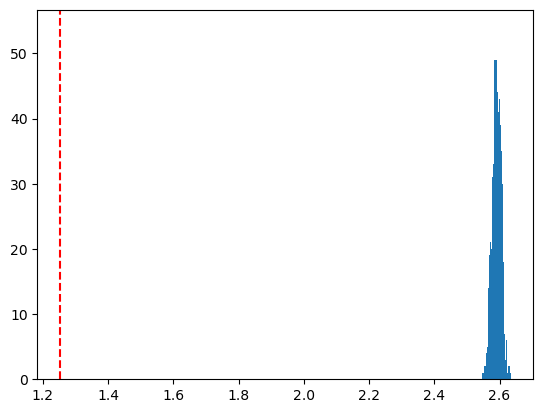

In [36]:
plt.hist(std_perm_avg,bins=50);
plt.axvline(x=avg_std_local, color='r', linestyle='--')


## Work in class - Day 4 - cluster analysis

1. Collect the expression data from a single section : 

exprs = adata.X[adata.obs['Slice']=='your fav slice',:]


2. Filter out columns - 
apply a filtering criterion of your choice (max, 95%, mean, etc) to all columns, look at histogram, chose cutoff, remove cols, 

3. Decide if / how to transform your data (log(x+1) / z-score)

4. Perform PCA
Look at scree plot and chose how many PCs you want to use moving forwrard. 

5. Look at heatmaps of your data (sns.clustermap)

6. Cluster